# Importing necessary libraries

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2
import imghdr

In [5]:
import os

# Remove unsupported images

In [3]:
image_exts = ['jpeg','jpg','bmp','png']

In [4]:
data_dir_train = 'dataset/Train'

In [272]:
def unnecessary_img_remove(data_dir):  
  for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
      image_path = os.path.join(data_dir, image_class, image)
      try:
        img = cv2.imread(image_path)
        tip = imghdr.what(image_path)
        if tip not in image_exts:
          print(f'Image not in ext list{image_path}')
          os.remove(image_path)
      except Exception as e:
        print(f'Issue with image{image_path}')

In [273]:
unnecessary_img_remove(data_dir_train)

# Loading data


In [10]:
from matplotlib import pyplot as plt

In [6]:
import os

dir_path = 'dataset/Train'
classes = os.listdir(dir_path)

for cl in classes:
    cl_path = os.path.join(dir_path, cl)
    print("Class: ", cl)
    print("Number of Images: ", len(os.listdir(cl_path)))


Class:  fruit
Number of Images:  576
Class:  motorbike
Number of Images:  576
Class:  person
Number of Images:  576


In [7]:
data_train = tf.keras.utils.image_dataset_from_directory(dir_path)

Found 1728 files belonging to 3 classes.


In [8]:
data_train_iterator = data_train.as_numpy_iterator()

In [9]:
batch_train = data_train_iterator.next()

In [10]:
batch_train[1]

array([0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 0,
       1, 1, 1, 2, 2, 1, 1, 1, 2, 2])

In [11]:
def plot_the_data(batch,mm,nn):

  fig, ax = plt.subplots(nrows=8,ncols=4,figsize=(20,20))
  plt.subplots_adjust(hspace=0.5)
  for idx, img in enumerate (batch[0][mm:nn]):
    row = idx // 4
    col = idx % 4
    ax[row,col].imshow(img.astype(int))
    ax[row,col].title.set_text(batch[1][idx])

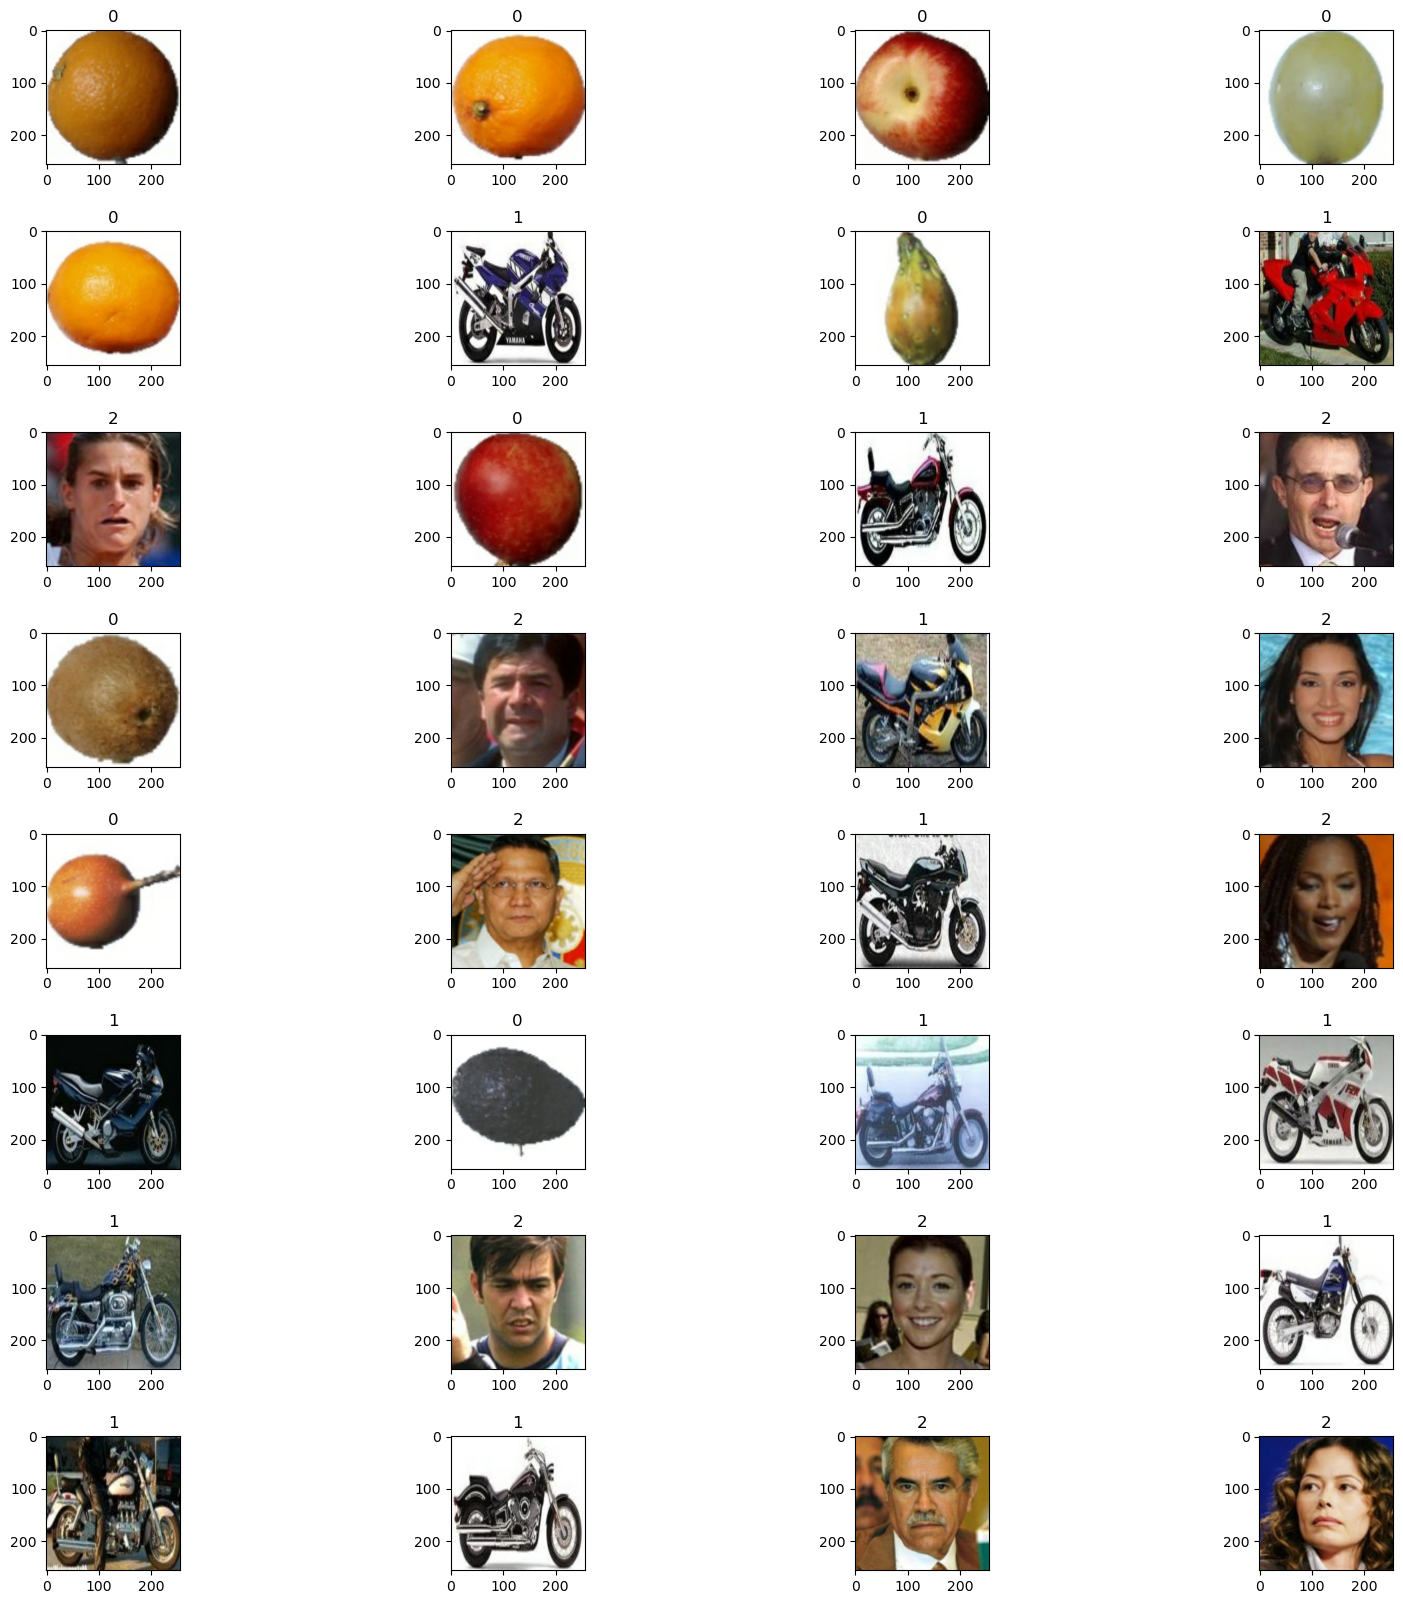

In [12]:
plot_the_data(batch_train,0,32)

# Scale data

In [13]:
def dataScale(data):
  data = data.map(lambda x,y:(x/255,y))
  To_numpy_iterator = data.as_numpy_iterator().next()
  print(To_numpy_iterator[0].max())
  print(To_numpy_iterator[0].min())

In [14]:
dataScale(data_train)

1.0
0.0


# Train and test data

In [15]:
len(data_train)

54

In [16]:
train_size = int(len(data_train)*.7)
val_size = int(len(data_train)*.2)+1
test_size = int(len(data_train)*.1)+1

In [17]:
train = data_train.take(train_size)
val = data_train.skip(train_size).take(val_size)
test = data_train.skip(train_size+val_size).take(test_size)

In [18]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# Building deep learning model

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [371]:
tf.random.set_seed(1234) 
model = Sequential(name='Image_Classifier')

In [372]:
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten(name='flatten'))

model.add(Dense(256, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.8))

# model.add(Dense(256, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.8))

model.add(Dense(3, activation='linear'))

In [373]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [374]:
model.summary()

Model: "Image_Classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_65 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_64 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_66 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_65 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_67 (Conv2D)          (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_66 (MaxPoolin  (None, 30, 30, 32)  

# Train

In [375]:
logdir = 'logs'

In [376]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [377]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
37/37 [==============================] - 7s 167ms/step - loss: 11.8471 - accuracy: 0.8361 - val_loss: 0.2837 - val_accuracy: 0.9347
Epoch 2/20
37/37 [==============================] - 6s 163ms/step - loss: 0.0333 - accuracy: 0.9907 - val_loss: 0.1224 - val_accuracy: 0.9801
Epoch 3/20
37/37 [==============================] - 6s 163ms/step - loss: 0.0499 - accuracy: 0.9890 - val_loss: 0.0728 - val_accuracy: 0.9773
Epoch 4/20
37/37 [==============================] - 6s 166ms/step - loss: 0.0122 - accuracy: 0.9975 - val_loss: 0.0278 - val_accuracy: 0.9915
Epoch 5/20
37/37 [==============================] - 6s 163ms/step - loss: 0.0145 - accuracy: 0.9966 - val_loss: 0.0658 - val_accuracy: 0.9886
Epoch 6/20
37/37 [==============================] - 6s 163ms/step - loss: 0.1840 - accuracy: 0.9755 - val_loss: 0.0553 - val_accuracy: 0.9886
Epoch 7/20
37/37 [==============================] - 6s 166ms/step - loss: 0.2242 - accuracy: 0.9527 - val_loss: 0.0950 - val_accuracy: 0.9830
Epoch

  # Plot
  

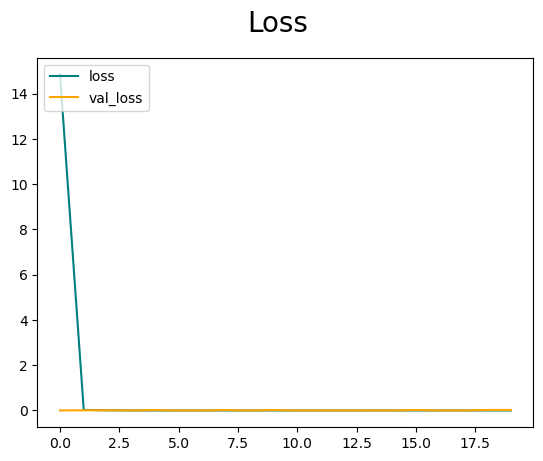

In [364]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

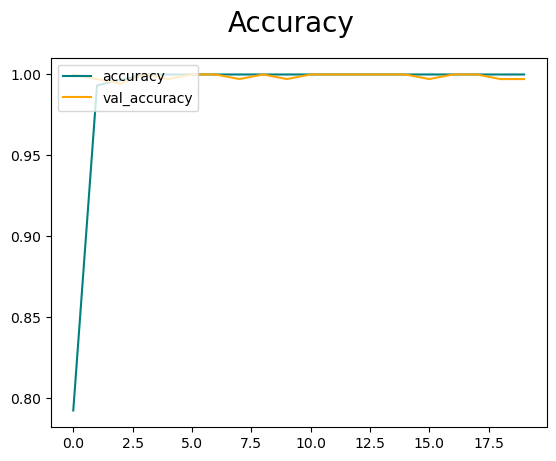

In [365]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evaluation

###  Prediction on test data

In [366]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = np.argmax(model.predict(X),axis = 1)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(f'prediction:{pre.result().numpy()}, result: {re.result().numpy()}, accuracy:{ acc.result().numpy()}')

1/1 [==============================] - 0s 42ms/step
prediction:1.0, result: 1.0, accuracy:0.8333333134651184


### Prediction on New Data

In [11]:
def color_adjust(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

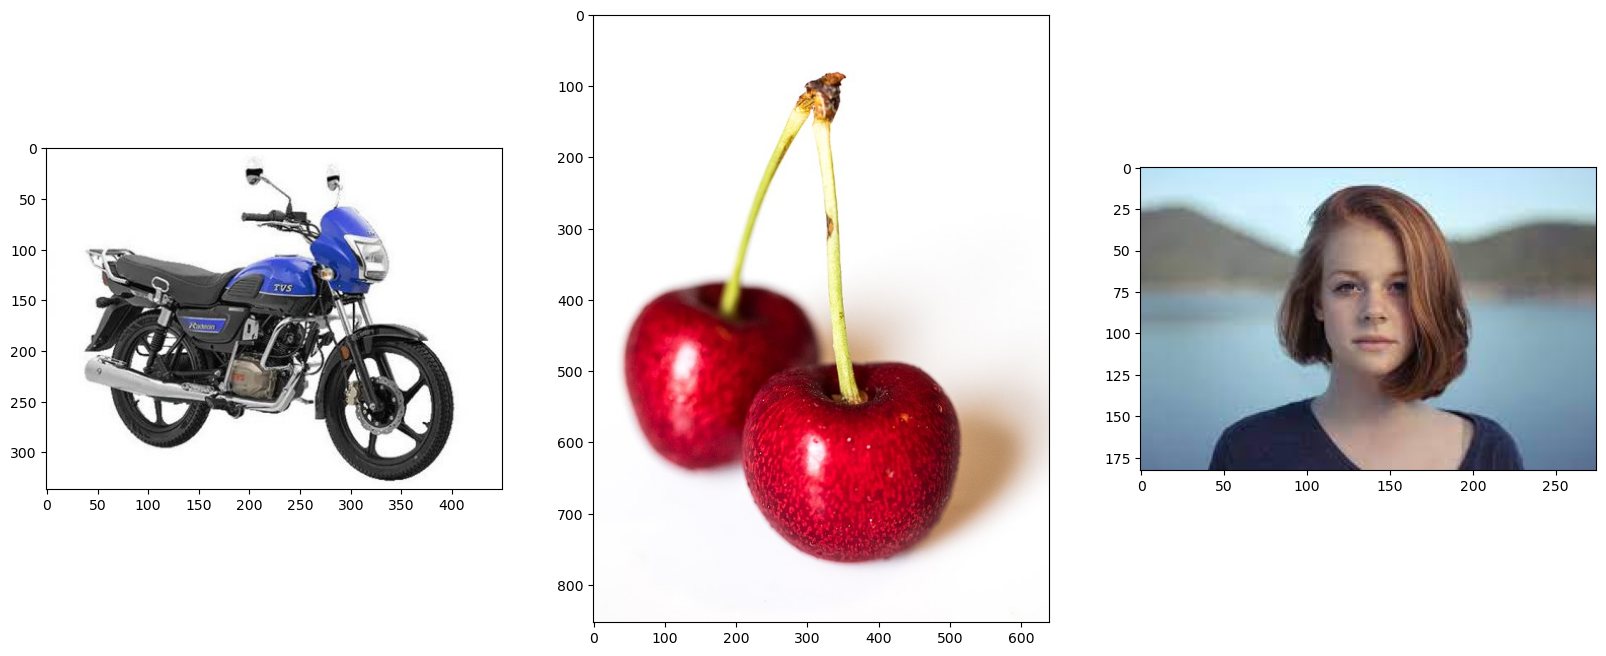

In [34]:
img0 = color_adjust(cv2.imread("NeverSeenData/bike.jpg"))
img1 = color_adjust(cv2.imread("NeverSeenData/fruit.jpg"))
img2 = color_adjust(cv2.imread("NeverSeenData/person1.jpg"))
img = [img0,img1,img2]
fig, ax = plt.subplots(ncols=3, figsize=(20,20))
plt.subplots_adjust(hspace=0.5)
for idx,image in enumerate (img):
    ax[idx].imshow(image)

In [35]:
resize0 = tf.image.resize(img0, (256,256))
resize1 = tf.image.resize(img1, (256,256))
resize2 = tf.image.resize(img2, (256,256))
resize = [resize0,resize1,resize2]

1/1 [==============================] - 0s 20ms/step


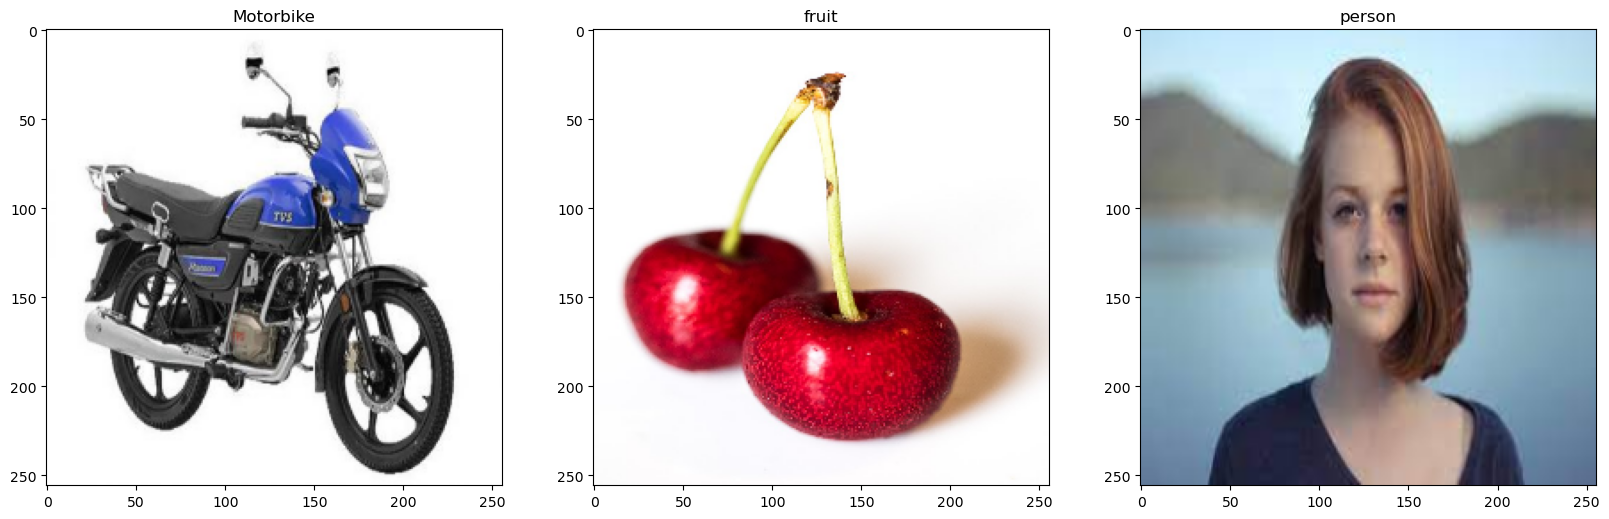

In [36]:
fig, ax = plt.subplots(ncols=3, figsize=(20,20))
plt.subplots_adjust(hspace=0.5)
for idx,img in enumerate (resize):
    yhat = model.predict(np.expand_dims(img/255, 0))
    img = img.numpy().astype(int)
    ax[idx].imshow(img)
    yhat = np.argmax(yhat)
    if yhat == 0: 
        label_predict = 'fruit'
    elif yhat ==  2:
        label_predict = 'person'
    elif yhat == 1:
        label_predict = 'Motorbike'    
    ax[idx].title.set_text(label_predict)
    

# Save

In [280]:
model.save(os.path.join('models','classifier2.h5'))

In [22]:
from tensorflow.keras.models import load_model
model = load_model("models\classifier2.h5")